# The Sparks Foundation GRIP program
### Data Science & Business Analytics Internship

### Task - 5 (‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’)

#### By - Dhananjay Pratap Lodhi

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) 
{
  return false;
}

To produce the visuals and dataframe in a frame without unnecessary scrolling.

In [2]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# creating a dataframe of the given data for easier analysis

deliveries = pd.read_csv(r"C:\Users\Medhavi\Desktop\GRIP\Task_5\deliveries.csv")
deliveries.head()                     # returns first 10 entries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
# used to get a concise summary of the dataframe

deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

In [5]:
# returns the number of rows and columns

deliveries.shape

(179078, 21)

In [6]:
# creating a dataframe of the given data for easier analysis

matches = pd.read_csv(r"C:\Users\Medhavi\Desktop\GRIP\Task_5\matches.csv")
matches.head()                    # returns first 10 entries

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
#used to get a concise summary of the dataframe

matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [8]:
# returns the number of rows and columns

matches.shape

(756, 18)

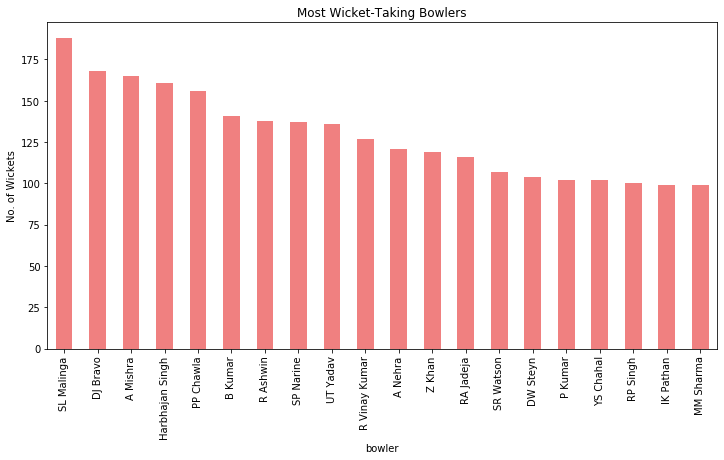

In [9]:
plt.figure(figsize=[12,6])
plt.title('Most Wicket-Taking Bowlers')
plt.ylabel('No. of Wickets')
deliveries.groupby('bowler').player_dismissed.count().sort_values(ascending=False)[:20].plot(kind='bar', color='lightcoral')

>The above chart clearly shows that Lasith Malinga is the most wicket-taking bowler of all time. Hence, he may has a big contribution in Mumbai Indians winning a match.  
He is followed by DJ Bravo, Amit Mishra and so on.

>There are 15 Indian bowlers among the TOP-20

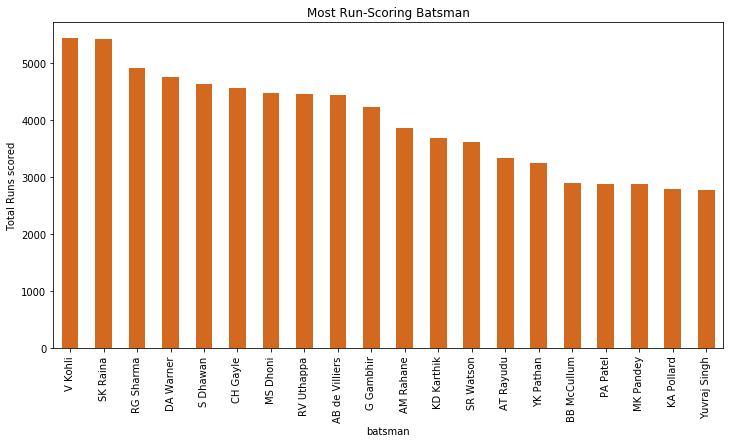

In [10]:
plt.figure(figsize=[12,6])
plt.title('Most Run-Scoring Batsman')
plt.ylabel('Total Runs scored')
deliveries.groupby('batsman').batsman_runs.sum().sort_values(ascending=False)[:20].plot(kind='bar', color='chocolate')

>The above chart clearly shows that Virat Kohli scored maximum number of runs all seasons combined.  
This indicates that he is in a good form and will continue to score runs for his team Royal Challengers Banglore.  
  
>He is followed by Suresh Raina, Rohit Sharma and so on.  
The Top-3 positions are occupied by Indian batsman.

In [11]:
top_scores = deliveries.groupby(["match_id", "batsman","batting_team", "bowling_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values('batsman_runs', ascending=False)[:10]

,match_id,batsman,batting_team,bowling_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,Pune Warriors,175
900,60,BB McCullum,Kolkata Knight Riders,Royal Challengers Bangalore,158
8426,562,AB de Villiers,Royal Challengers Bangalore,Mumbai Indians,133
10149,7935,RR Pant,Delhi Daredevils,Sunrisers Hyderabad,130
9257,620,AB de Villiers,Royal Challengers Bangalore,Gujarat Lions,129
5585,372,CH Gayle,Royal Challengers Bangalore,Delhi Daredevils,128
3135,206,M Vijay,Chennai Super Kings,Rajasthan Royals,127
529,36,DA Warner,Sunrisers Hyderabad,Kolkata Knight Riders,126
7752,516,V Sehwag,Kings XI Punjab,Chennai Super Kings,122
10417,7953,SR Watson,Chennai Super Kings,Sunrisers Hyderabad,121


>The above result is used to get information related to highest runs scored by a batsman in an inning.  
 
>It can easily be concluded that Chris Gayle scored the highest runs in an inning i.e. 175 runs, followed  
by Brandon McCullum (158 runs), AB de Villiers (133 runs) and so on.

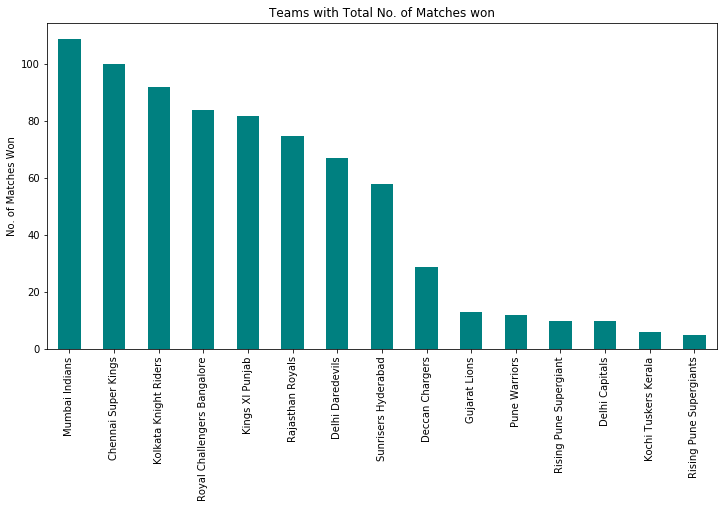

In [12]:
plt.figure(figsize=[12,6])
plt.title('Teams with Total No. of Matches won')
plt.ylabel('No. of Matches Won')
matches.winner.value_counts().plot(kind='bar', color='teal')

The above result is used to get information related to the total number of matches won by a team.
>It can easily be concluded that Mumbai Indians won the maximum number of matches among all the  
teams, followed by Chennai Super Kings, Kolkata Knight Riders and so on.

<BarContainer object of 2 artists>

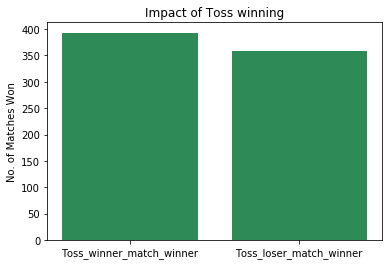

In [13]:
plt.title('Impact of Toss winning')
plt.ylabel('No. of Matches Won')
result = ['Toss_winner_match_winner', 'Toss_loser_match_winner']
count = [matches[matches.toss_winner == matches.winner].winner.count(), matches[matches.toss_winner != matches.winner].winner.count()]
plt.bar(result, count, color='seagreen')

>Above chart is used to show the impact of winning a toss over winning a match.  
  
  
>From results, it is clear that winning a toss alone does not greatly affect the result of a match as the  
difference between matches won by winning the toss and by loosing the toss is only 34.

<BarContainer object of 2 artists>

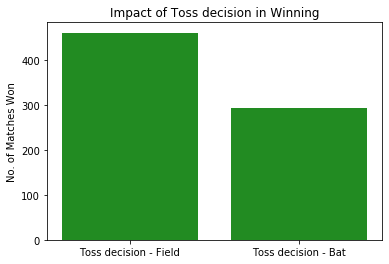

In [14]:
plt.title('Impact of Toss decision in Winning')
plt.ylabel('No. of Matches Won')
result1 = ['Toss decision - Field', 'Toss decision - Bat']
count1 = [matches[matches.toss_decision == 'field'].winner.count(), matches[matches.toss_decision == 'bat'].winner.count()]
plt.bar(result1, count1, color='forestgreen')

>Above chart is used to show the impact of toss decision over winning a match.

>From results, it is clear that teams that choose to field first has higher chance of winning  
the match than the teams choosing to bat first.

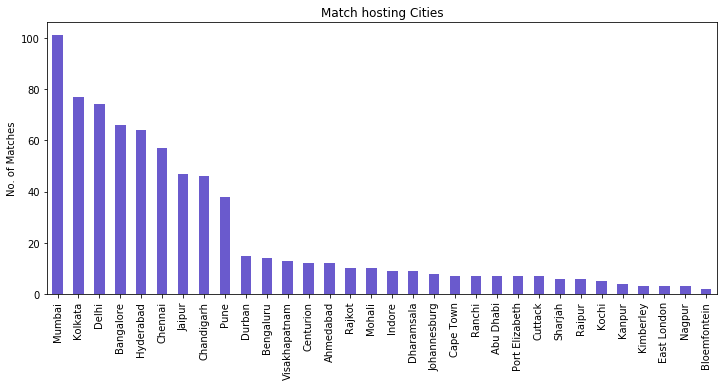

In [15]:
plt.figure(figsize=[12,5])
plt.title('Match hosting Cities')
plt.ylabel('No. of Matches')
matches.city.value_counts().plot(kind='bar', color='slateblue')

>Above chart shows the number of IPL matches played in a city.

>Mumbai has hosted the maximum number of IPL matches at the world famous 'Wankhede Stadium',  
followed by Kolkata, Delhi and so on.

>Some cities are from outside India as the matches could not be conducted in India due to some reasons. 

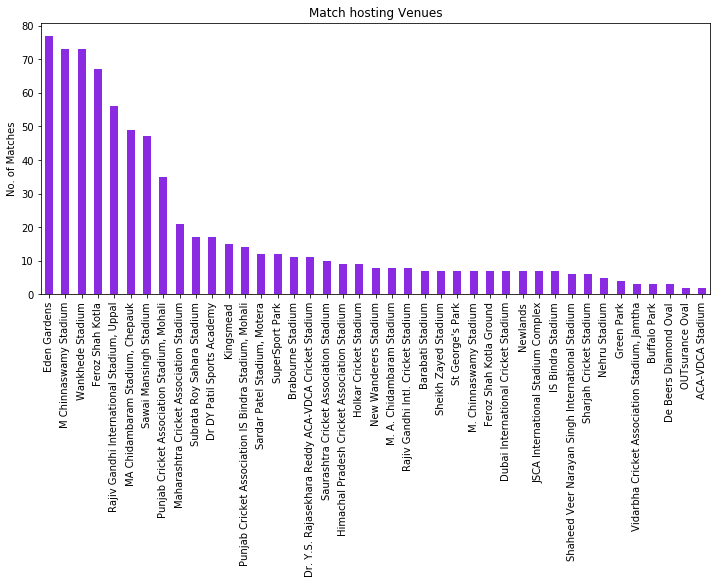

In [16]:
plt.figure(figsize=[12,5])
plt.title('Match hosting Venues')
plt.ylabel('No. of Matches')
matches.venue.value_counts().plot(kind='bar', color='blueviolet')

>Above chart shows the number of IPL matches played at a venue.

>Eden Gardens has hosted the maximum number of IPL matches situated in West Bengal,
followed  
by M Chinnaswamy Stadium (Karnataka), Wankhede Stadium (Maharashtra) and so on.

>Some stadiums are from outside India as the matches could not be conducted in India due to some reasons.

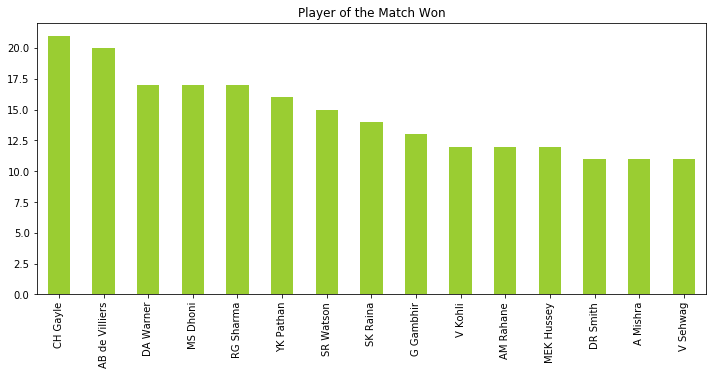

In [17]:
plt.figure(figsize=[12,5])
plt.title('Player of the Match Won')
matches.player_of_match.value_counts()[:15].plot(kind='bar', color='yellowgreen')

>Above chart shows the number of times a player has been selected as the 'Player of the Match'.

>Chris Gayle has became 'Player of the Match' maximum number of times which clearly indicates his  
popularity among all the team selectors during the auction.

>There are 8 Indians among the Top-15 players.

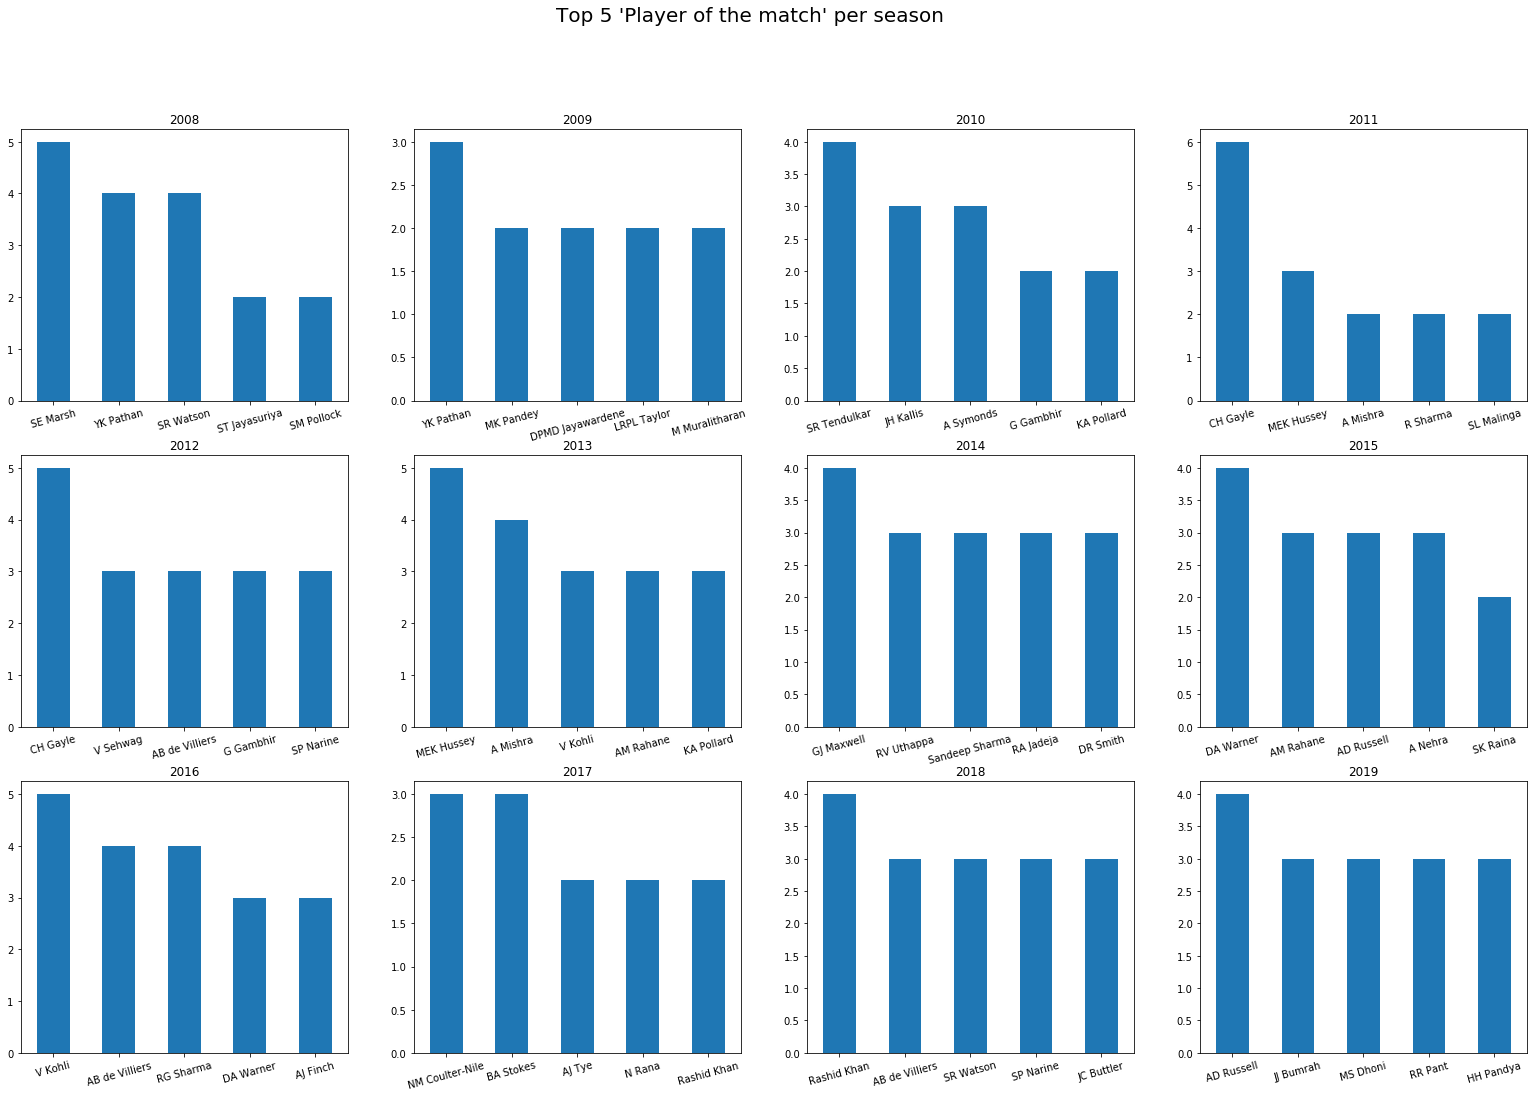

In [18]:
plt.figure(figsize=[27,17])
plt.suptitle("Top 5 'Player of the match' per season", fontsize=20)
season1 = 2008
for i in range(1,13):
        plt.subplot(3,4,i)
        plt.title(season1)
        matches[matches.season == season1].player_of_match.value_counts()[:5].plot(kind='bar')
        plt.xticks(rotation = 15)
        season1 += 1
plt.show()

>From the above charts, we can easily see the top players from each season.  
Such analysis helps the team selectors to choose the players wisely during the auction.

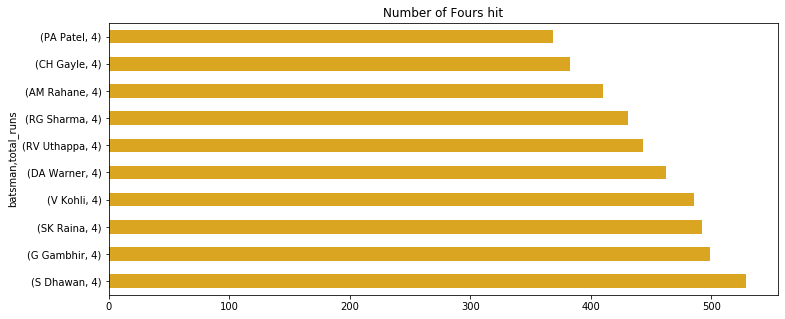

In [19]:
plt.figure(figsize=[12,5])
plt.title('Number of Fours hit')
fours = deliveries[deliveries.total_runs == 4].groupby('batsman')
fours.total_runs.value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='goldenrod')

>Shikhar Dhawan has hit maximum number of fours of all time.

>There are 8 Indians among Top-10

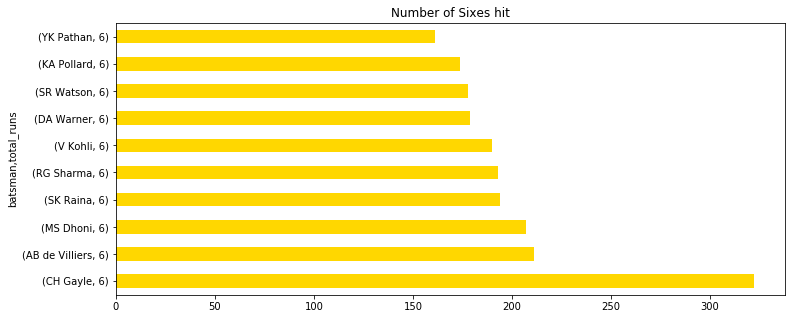

In [20]:
plt.figure(figsize=[12,5])
plt.title('Number of Sixes hit')
sixes = deliveries[deliveries.total_runs == 6].groupby('batsman')
sixes.total_runs.value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='gold')

>Chris Gayle has hit maximum number of sixes of all time.

>There 5 Indians among Top-10 starting from MS Dhoni at 3rd position.